# __Where's the market? An analysis of the most popular American cities for touring musicians to visit__

### Carson Bauer

![Taylor Swift Eras Tour 2023 American dates poster](https://i.redd.it/just-announced-official-poster-dates-for-taylor-swifts-v0-m8xhk61t2cx91.jpg?width=1080&format=pjpg&auto=webp&s=eadf1c32a6d62db422d1817c6f02e039bd8cdd34)

When a musician announces an upcoming tour on social media, it's inevitable that all of the comments will only be complaints that they aren't traveling to the commenter's city. Of course, musicians only want to travel to cities where there's a large market and a high chance of recouping their expenses. But, outside of NYC and LA: where's the money? This project serves to analyze the top-visited locations in America by the most profitable tours to find trends and understand why musicians may make these decisions. Through this project, I want to see whether these fan complaints are accurate, or if people are noticiing unfounded trends. If these trends are accurate, I want to see why these states are visited so often.

I want to look at the times each state was visited, the number of individual states that were visited within each state, as well as the total revenue and attendance broken down by state. My hypothesis is that the more cities visited per state, the higher the revenue would be. More cities implies a larger market, and could mean higher ticket prices. I also hypothesize that New York and California will be at the top of the charts.

## Data Collection

In [2]:
import pandas as pd
import json as js
import requests
from io import StringIO
from matplotlib import pyplot as plt
import numpy as np
import re

pd.set_option('display.float_format', '{:.0f}'.format) 

For this project, I am using [this Wikipedia page](https://en.wikipedia.org/wiki/List_of_highest-grossing_concert_tours) that details the top 20 highest-grossing tours of all time. I am taking the top five tours from this list to analyze. Within each Wikipedia page, the data is cited from Pollstar, a trade publication for the live music industry. I could not access the raw Pollstar data because it was under a paywall. The Pollstar data is used for investors to see, as well as for tour managers to look at to make decisions about their own musicians.

Within these Wikipedia pages, the Eras Tour (#1 on the list) does not include data for attendance or gross broken down by show like the other tours do. So I include the 6th tour on this list (Love On Tour) to supplement the missing data and give me more to work with.

In [3]:
top_tours = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_concert_tours'
response1 = requests.get(top_tours)
top_tours_list = pd.read_html(StringIO(response1.text))
top_tours_list[1].head(6)

,Rank,Peak,Actual gross,Adjusted gross (in 2023 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,"$2,077,618,725","$2,077,618,725",Taylor Swift,The Eras Tour,2023–2024,149,"$13,943,750",[9]
1,2,1,"$1,144,588,329","$1,144,588,329",Coldplay,Music of the Spheres World Tour †,2022–2025,175,"$6,540,505",[8]
2,3,1,"$939,100,000","$939,100,000",Elton John,Farewell Yellow Brick Road,2018–2023,330,"$2,845,758",[11]
3,4,1,"$776,200,000","$925,014,604",Ed Sheeran,÷ Tour,2017–2019,255,"$3,043,922",[12]
4,5,1,"$736,421,586","$997,437,284",U2,360° Tour,2009–2011,110,"$6,694,742",[13]
5,6,4,"$617,325,000","$617,325,000",Harry Styles,Love On Tour,2021–2023,169,"$3,652,811",[14]


From here, I go to the individual page of each tour and scrape the table that contains the dates, cities, and venues of each stop on the tour.

_Taylor Swift_

In [4]:
eras_tour = 'https://en.wikipedia.org/wiki/The_Eras_Tour#:~:text=Long%20Story%20Short%22-,Tour%20dates,-List%20of%202023'

In [5]:
response2 = requests.get(eras_tour)
# response2.status_code
eras_tour_list = pd.read_html(StringIO(response2.text))
# type(eras_tour_list)

Here is an excerpt of the raw table as extracted from Wikipedia. Other tours include numbers for Attendance and Revenue for most shows, and the Eras Tour is an outlier.

In [6]:
eras_2023 = eras_tour_list[7]
eras_2024 = eras_tour_list[8]

eras_2023.head()

,Date (2023),City,Country,Venue,Opening acts,Attendance,Revenue
0,March 17,Glendale,United States,State Farm Stadium,Paramore Gayle,—,—
1,March 18,Glendale,United States,State Farm Stadium,Paramore Gayle,—,—
2,March 24,Paradise[i],United States,Allegiant Stadium,Beabadoobee Gayle,—,—
3,March 25,Paradise[i],United States,Allegiant Stadium,Beabadoobee Gayle,—,—
4,March 31,Arlington,United States,AT&T Stadium,Muna Gayle,—,—


For some of the tours, Wikipedia splits up the tour into different tables by year, so I get both tables and then merge them into one. I kept the year as part of the date just to help differentiate the two in case I needed it.

In [7]:
eras_2023['Date (2023)'] = eras_2023['Date (2023)'].astype(str) + ' 2023'
eras_2024['Date (2024)'] = eras_2024['Date (2024)'].astype(str) + ' 2024'

eras_2023.rename(columns={'Date (2023)': 'Date'}, inplace=True)
eras_2024.rename(columns={'Date (2024)': 'Date'}, inplace=True)

In [8]:
eras_tour_merged = pd.concat([eras_2023, eras_2024], axis = 0)
eras_tour_merged['Artist'] = "Taylor Swift"
# eras_tour_merged.head()

Some of the tours also included the opening acts. Since this wasn't true for all tours, and I wouldn't need to analyze this anyways, I opted to just remove the column.

In [9]:
eras_tour_merged.drop(['Opening acts'], axis=1, inplace=True)
eras_tour_merged.head()

,Date,City,Country,Venue,Attendance,Revenue,Artist
0,March 17 2023,Glendale,United States,State Farm Stadium,—,—,Taylor Swift
1,March 18 2023,Glendale,United States,State Farm Stadium,—,—,Taylor Swift
2,March 24 2023,Paradise[i],United States,Allegiant Stadium,—,—,Taylor Swift
3,March 25 2023,Paradise[i],United States,Allegiant Stadium,—,—,Taylor Swift
4,March 31 2023,Arlington,United States,AT&T Stadium,—,—,Taylor Swift


_Coldplay_

In [10]:
c_tour = 'https://en.wikipedia.org/wiki/Music_of_the_Spheres_World_Tour'

In [11]:
response4 = requests.get(c_tour)
# response4.status_code
coldplay = pd.read_html(StringIO(response4.text))
# type(coldplay)

In [12]:
coldplay_tour_22 = coldplay[2]
coldplay_tour_23 = coldplay[3]
coldplay_tour_24 = coldplay[4]
coldplay_tour_25 = coldplay[5]

Adding the year to each date and renaming the column

In [13]:
coldplay_tour_22['Date (2022)'] = coldplay_tour_22['Date (2022)'].astype(str) + ' 2022'
coldplay_tour_22.rename(columns={'Date (2022)': 'Date'}, inplace=True)

coldplay_tour_23['Date (2023)'] = coldplay_tour_23['Date (2023)'].astype(str) + ' 2023'
coldplay_tour_23.rename(columns={'Date (2023)': 'Date'}, inplace=True)

coldplay_tour_24['Date (2024)'] = coldplay_tour_24['Date (2024)'].astype(str) + ' 2024'
coldplay_tour_24.rename(columns={'Date (2024)': 'Date'}, inplace=True)

coldplay_tour_25['Date (2025)'] = coldplay_tour_25['Date (2025)'].astype(str) + ' 2025'
coldplay_tour_25.rename(columns={'Date (2025)': 'Date'}, inplace=True)

In [14]:
coldplay_merged = pd.concat([coldplay_tour_22, coldplay_tour_23, coldplay_tour_24, coldplay_tour_25], axis = 0)

coldplay_merged.drop(['Opening acts'], axis=1, inplace=True)
coldplay_merged['Artist'] = "Coldplay"

coldplay_merged.head()

,Date,City,Country,Venue,Attendance,Revenue,Artist
0,18 March 2022,San José,Costa Rica,Estadio Nacional de Costa Rica,"86,199 / 86,199","$5,687,127",Coldplay
1,19 March 2022,San José,Costa Rica,Estadio Nacional de Costa Rica,"86,199 / 86,199","$5,687,127",Coldplay
2,22 March 2022,Santo Domingo,Dominican Republic,Estadio Olímpico Félix Sánchez,"30,524 / 30,524","$2,571,873",Coldplay
3,25 March 2022,Guadalupe[i],Mexico,Estadio BBVA,"112,262 / 112,262","$8,996,432",Coldplay
4,26 March 2022,Guadalupe[i],Mexico,Estadio BBVA,"112,262 / 112,262","$8,996,432",Coldplay


_Elton John_

In [15]:
ej = 'https://en.wikipedia.org/wiki/Farewell_Yellow_Brick_Road'
response3 = requests.get(ej)
# response3.status_code
ej_list = pd.read_html(StringIO(response3.text))
# type(ej_list)

Because of the formatting of Wikipedia, some of the tours are broken up by leg, and it resulted in weird column titles. I figured out the best way to deal with this was to just manually rename it.

In [16]:
ej_tours = ej_list[1]
ej_tours.head(1)

,Date,City,Country,Venue,Attendance,Revenue
,North America[32][33][34],North America[32][33][34],North America[32][33][34],North America[32][33][34],North America[32][33][34],North America[32][33][34]
0,8 September 2018,Allentown,United States,PPL Center,"8,983 / 8,983","$1,492,859"


In [17]:
ej_tours.columns = ['Date', 'City', 'Country', 'Venue', 'Attendance', 'Revenue']
ej_tours.head(1)

,Date,City,Country,Venue,Attendance,Revenue
0,8 September 2018,Allentown,United States,PPL Center,"8,983 / 8,983","$1,492,859"


In [18]:
ej_tours['Artist'] = "Elton John"

_Ed Sheeran_

In [19]:
es_tour = 'https://en.wikipedia.org/wiki/%C3%B7_Tour'

In [20]:
response5 = requests.get(es_tour)
# response5.status_code

In [21]:
sheeran = pd.read_html(StringIO(response5.text))

In [22]:
divide_tour_1 = sheeran[1]
divide_tour_2 = sheeran[2]

# divide_tour_1.head()

Once again, adding the year to the dates and renaming all of the columns

In [23]:
divide_tour_2.columns = ['Date', 'City', 'Country', 'Venue', 'Opening acts', 'Attendance', 'Revenue']

divide_tour_1['Dates (2017)'] = divide_tour_1['Dates (2017)'].astype(str) + ' 2017'
divide_tour_1.rename(columns={'Dates (2017)': 'Date'}, inplace=True)

divide_tour_2['Date'] = divide_tour_2['Date'].astype(str) + ' 2018'

# divide_tour_1.head()

In [24]:
divide_merged = pd.concat([divide_tour_1, divide_tour_2], axis = 0)

divide_merged.drop(['Opening acts'], axis=1, inplace=True)
divide_merged.drop(['Opening act(s)'], axis=1, inplace=True)
divide_merged['Artist'] = "Ed Sheeran"

#divide_merged.head()

_U2_

In [25]:
u2 = 'https://en.wikipedia.org/wiki/U2_360%C2%B0_Tour'

In [26]:
response6 = requests.get(u2)
# response6.status_code
u2_tour = pd.read_html(StringIO(response6.text))

In [27]:
u2_tour_df = u2_tour[1]
# u2_tour_df.head()

In [28]:
u2_tour_df.columns = ['Date', 'City', 'Country', 'Venue', 'Opening acts', 'Attendance', 'Revenue']

u2_tour_df.drop(['Opening acts'], axis=1, inplace=True)
u2_tour_df['Artist'] = "U2"

_Harry Styles_

As I mentioned, this is the sixth tour on the list, to try and pad out my data without the manual labor added by needing to assign states to the cities of ten tours (more on that later)

In [29]:
hs = 'https://en.wikipedia.org/wiki/Love_On_Tour'

In [30]:
response7 = requests.get(hs)
# response7.status_code
hs_tour = pd.read_html(StringIO(response7.text))

In [31]:
hs_tour_21 = hs_tour[2]
hs_tour_22 = hs_tour[3]
hs_tour_23 = hs_tour[4]

In [32]:
hs_tour_21['Date (2021)'] = hs_tour_21['Date (2021)'].astype(str) + ' 2021'
hs_tour_21.rename(columns={'Date (2021)': 'Date'}, inplace=True)

hs_tour_22['Date (2022)'] = hs_tour_22['Date (2022)'].astype(str) + ' 2022'
hs_tour_22.rename(columns={'Date (2022)': 'Date'}, inplace=True)

hs_tour_23['Date (2023)'] = hs_tour_23['Date (2023)'].astype(str) + ' 2023'
hs_tour_23.rename(columns={'Date (2023)': 'Date'}, inplace=True)

In [33]:
hs_merged = pd.concat([hs_tour_21, hs_tour_22, hs_tour_23], axis = 0)

hs_merged.drop(['Opening acts'], axis=1, inplace=True)
hs_merged['Artist'] = "Harry Styles"

_Merged Tours_

Finally, we have all of the tours in one dataframe! Here come the last few steps of cleaning the data before I can start the actual analysis.

In [34]:
tours_merged_df = pd.concat([divide_merged, coldplay_merged, u2_tour_df, eras_tour_merged, hs_merged, ej_tours])
tours_merged_df.head()

,Date,City,Country,Venue,Attendance,Revenue,Artist
0,16 March 2017,Turin,Italy,Pala Alpitour,"23,256 / 23,256","$1,219,480",Ed Sheeran
1,17 March 2017,Turin,Italy,Pala Alpitour,"23,256 / 23,256","$1,219,480",Ed Sheeran
2,19 March 2017,Zürich,Switzerland,Hallenstadion,"14,444 / 14,444","$1,148,585",Ed Sheeran
3,20 March 2017,Munich,Germany,Olympiahalle,"12,076 / 12,108","$919,768",Ed Sheeran
4,22 March 2017,Mannheim,Germany,SAP Arena,"10,843 / 10,848","$740,662",Ed Sheeran


Since I'm only familiar with US cities and states, those are the only ones I will analyze. Here I'm deleting all rows that don't have United States as the value in the Country column.

In [35]:
tours_merged_df = tours_merged_df[tours_merged_df['Country'] == 'United States']

Some of the cities had citations like [i] so they weren't registering as being the same, so I got rid of all of those.

In [36]:
tours_merged_df['City'] = tours_merged_df['City'].str.replace(r'\[.*?\]', '', regex=True)

Again, getting rid of all the extra characters and then converting it to numeric. I might have been able to keep the '$' but I wasn't sure so I just cut it.

In [37]:
tours_merged_df['Revenue'] = tours_merged_df['Revenue'].str.replace('$', '')
tours_merged_df['Revenue'] = tours_merged_df['Revenue'].str.replace(',', '')
tours_merged_df['Revenue'] = tours_merged_df['Revenue'].str.replace('—', '')
tours_merged_df['Revenue'] = tours_merged_df['Revenue'].str.replace(r'\[.*?\]', '', regex=True)

In [38]:
tours_merged_df['Revenue'] = pd.to_numeric(tours_merged_df['Revenue'])

Same as the revenue, making it numeric and removing the extra characters.

In [39]:
tours_merged_df['Attendance'] = tours_merged_df['Attendance'].str.split(' ').str[0]
tours_merged_df['Attendance'] = tours_merged_df['Attendance'].str.replace(',', '')
tours_merged_df['Attendance'] = tours_merged_df['Attendance'].str.replace('—', '')
tours_merged_df['Attendance'] = tours_merged_df['Attendance'].str.replace(r'\[.*?\]', '', regex=True)

In [40]:
tours_merged_df['Attendance'] = pd.to_numeric(tours_merged_df['Attendance'])

Here is the big manual part of the data scraping. I was very interested in looking at the states visited, because I felt only having the cities would make it harder to see trends, since each state likely has multiple cities. But since this was not included on the table, I had to do it manually.

First, I got all of the unique values in the "City" column, to get each city visited on all of the tours.

In [41]:
unique_values = tours_merged_df['City'].unique()
unique_values = unique_values.tolist()

unique_values.sort()

# print(unique_values)

Here is where I got worried that there might be venues in Portland, Oregon as well as Portland, Maine, but I guess the city in Maine is not as big as I thought.

In [42]:
tours_merged_df.loc[tours_merged_df['City'] == 'Portland']

,Date,City,Country,Venue,Attendance,Revenue,Artist
67,30 July 2017,Portland,United States,Moda Center,13420,1074959,Ed Sheeran
31,8 November 2021,Portland,United States,Moda Center,17890,2125697,Harry Styles
43,12 January 2019,Portland,United States,Moda Center,14584,1843608,Elton John


I copied this list of cities into a Google doc, and set out on manually matching each city to a state in a dictionary format. Most of the cities I knew only had one state associated (i.e. Hollywood, CA) and I knew the state immediately, but for the handful I wasn't sure about I would plug the city into the line above, here and then Google the venue to confirm the state.

Building the dictionary honestly only took about 20-30 minutes of active work since I knew most of the information off-hand, but it was definitely only this easy because I limited my analysis to only six tours. Many of the tours have overlapping cities, but I added Love on Tour later and had to go back and add new cities. This added ~5 cities not previously covered, so picture that work times every new tour added to the project.

In [43]:
cities_dictionary = {'Albany' : 'New York','Allentown' : 'Pennsylvania','Anaheim' : 'California','Arlington' : 'Texas','Atlanta' : 'Georgia','Austin' : 'Texas', 'Baltimore' : 'Maryland', 'Birmingham' : 'Alabama', 'Boise' : 'Idaho', 'Boston' : 'Massachusetts', 'Brooklyn' : 'New York', 'Buffalo' : 'New York', 'Charleston' : 'North Carolina', 'Charlotte' : 'North Carolina', 'Charlottesville': 'Virginia', 'Chicago' : 'Illinois', 'Cincinnati' : 'Ohio', 'Cleveland' : 'Ohio', 'Columbia' : 'South Carolina', 'Columbus': 'Ohio', 'Dallas' : 'Texas', 'Denver' : 'Colorado', 'Des Moines' : 'Iowa', 'Detroit' : 'Michigan', 'Duluth' : 'Georgia', 'East Lansing' : 'Michigan', 'East Rutherford' : 'New Jersey', 'Elmont' : 'New York', 'El Paso' : 'Texas', 'Fargo' : 'North Dakota', 'Foxborough' : 'Massachussets', 'Fresno' : 'California', 'Glendale' : 'California', 'Grand Rapids' : 'Michigan', 'Greensboro' : 'North Carolina', 'Hartford' : 'Connecticut', 'Hershey' : 'Pennsylvania', 'Hollywood' : 'California', 'Houston' : 'Texas', 'Indianapolis' : 'Indiana', 'Inglewood' : 'California', 'Jacksonville' : 'Florida', 'Kansas City' : 'Missouri', 'Knoxville' : 'Tennessee', 'Landover' : 'Maryland', 'Las Vegas' : 'Nevada', 'Lexington' : 'Kentucky', 'Lincoln' : 'Nebraska', 'Los Angeles' : 'California', 'Louisville' : 'Kentucky', 'Madison' : 'Wisconsin', 'Memphis' : 'Tennessee', 'Miami' : 'Florida', 'Miami Gardens' : 'Florida', 'Milwaukee' : 'Wisconsin', 'Minneapolis' : 'Minnesota', 'Nashville' : 'Tennessee', 'New Orleans' : 'Louisiana', 'New York City' : 'New York', 'Newark' : 'New Jersey', 'Norman' : 'Oklahoma', 'North Charleston' : 'South Carolina', 'North Little Rock' : 'Arkansas', 'Oakland' : 'California', 'Oklahoma City' : 'Oklahoma', 'Omaha' : 'Nebraska', 'Orlando' : 'Florida', 'Paradise' : 'Nevada', 'Pasadena' : 'California', 'Philadelphia' : 'Pennsylvania', 'Phoenix' : 'Arizona', 'Pittsburgh' : 'Pennsylvania', 'Portland' : 'Oregon', 'Raleigh' : 'North Carolina', 'Rosemont' : 'Illinois', 'Sacramento' : 'California', 'Saint Paul' : 'Minnesota', 'Salt Lake City' : 'Utah', 'San Antonio' : 'Texas', 'San Diego' : 'California', 'San Francisco' : 'California', 'San Jose' : 'California', 'Santa Clara' : 'California', 'Seattle' : 'Washington', 'St. Louis' : 'Missouri', 'Stanford' : 'California', 'Sunrise' : 'Florida', 'Syracuse' : 'New York', 'Tacoma' : 'Washington', 'Tampa' : 'Florida', 'Thousand Palms' : 'California', 'Tulsa' : 'Oklahoma', 'Uncasville': 'Connecticut', 'Uniondale' : 'New York', 'University Park' : 'Pennsylvania', 'Washington, D.C.' : 'Washington, D.C.', 'Whitney' : 'Nevada'}

Defining the function for assigning each city a state.

In [44]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

Applying the dictionary to the dataframe in a new column, and now I have the states attached!

In [45]:
tours_merged_df['State'] = tours_merged_df['City'].apply(set_value, args=(cities_dictionary, ))
tours_merged_df.head()

,Date,City,Country,Venue,Attendance,Revenue,Artist,State
49,29 June 2017,Kansas City,United States,Sprint Center,13382,1217313,Ed Sheeran,Missouri
50,30 June 2017,Des Moines,United States,Wells Fargo Arena,13375,1078939,Ed Sheeran,Iowa
51,1 July 2017,Saint Paul,United States,Xcel Energy Center,14938,1375063,Ed Sheeran,Minnesota
54,9 July 2017,Buffalo,United States,KeyBank Center,14305,1167095,Ed Sheeran,New York
55,11 July 2017,Philadelphia,United States,Wells Fargo Center,28922,2630260,Ed Sheeran,Pennsylvania


Here is where I start to clean the data specifically for visualization.

This creates a dataframe that counts the instances of each state appearing in the dataframe, which is the number of times the state was visited by each artist.

In [46]:
state_count_df = tours_merged_df['State'].value_counts().rename_axis('State').reset_index(name='State Num')
state_count_df.head(3)

,State,State Num
0,California,79
1,New York,44
2,Texas,37


This creates a dataframe from the dictionary, listing the city alongside the state. I then use this to count the number of times that each state appears in the dataframe (i.e. the number of cities there are in each state)

In [47]:
unique_cities = pd.DataFrame.from_dict(cities_dictionary, orient='index', columns=['State'])
unique_cities = unique_cities.reset_index(names='City')

unique_cities.head(3)

,City,State
0,Albany,New York
1,Allentown,Pennsylvania
2,Anaheim,California


In [48]:
num_cities_count_df = unique_cities['State'].value_counts().rename_axis('State').reset_index(name='Cities Num')
# num_cities_count_df

The next two blocks of code get the revenue by state and the total number of attendees per state.

In [49]:
state_rev = tours_merged_df.groupby('State')['Revenue'].sum()
state_rev_df = state_rev.rename_axis('State').reset_index(name='Revenue')
state_rev_df = state_rev_df.sort_values(by='Revenue', ascending = False)

In [50]:
state_attendance = tours_merged_df.groupby('State')['Attendance'].sum()
state_att_df = state_attendance.rename_axis('State').reset_index(name='Attendance')
state_att_df = state_att_df.sort_values(by='Attendance', ascending = False)
# state_att_df.head()

Merging all four dataframes into one dataframe, which I can then use for all of my analysis!

In [51]:
analysis_df = pd.merge(pd.merge(pd.merge(state_count_df, num_cities_count_df, how = 'inner'), state_att_df, how = 'inner'), state_rev_df, how = 'inner')
# cities_states_merged

## Analysis

Starting out, we have a rather large chart that shows the number of times each state was visited. I Felt this was important to include in it's entirety because it provides a kind of "baseline" for the charts that come after: to get a sense of what states might be lower, and to familiarize yourself with the states that are going to be appearing a lot. Plus, having it on such a large scale really drives home how many times California was visited: almost twice as many times as the state below (which makes sense, because California's state population is more than twice as much as New York's). 

Text(0.5, 0.98, 'Times each state was visited')

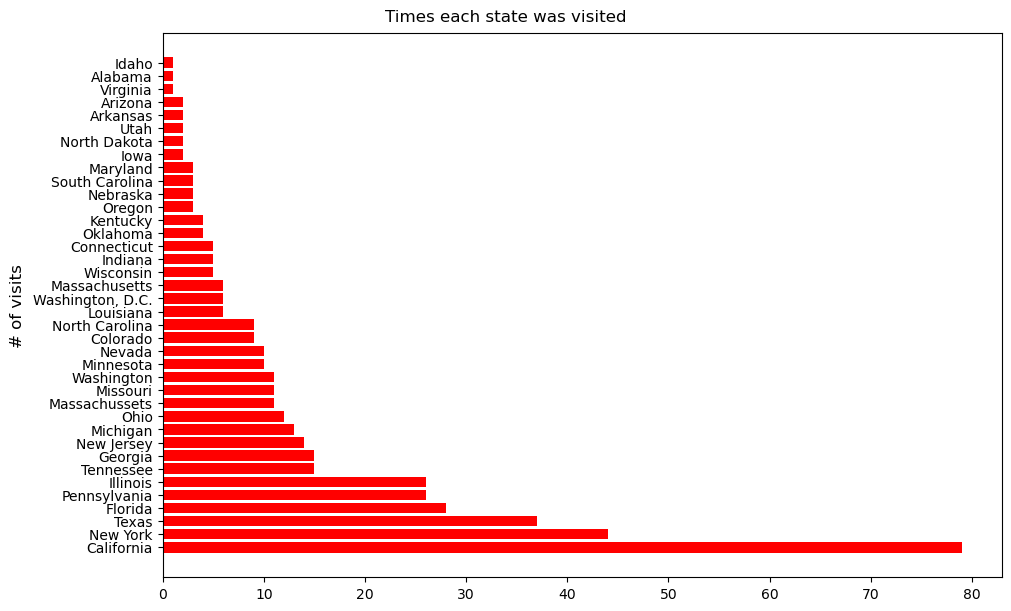

In [52]:
fig1, ax1 = plt.subplots(figsize = (10,6), layout = 'constrained')
ax1.barh(analysis_df['State'], analysis_df['State Num'], color ='red')

fig1.supylabel('# of visits')
fig1.suptitle('Times each state was visited')

From here on out, I'll (mostly) just be using the upper sections of the data.

Here I have the previous chart, overlayed with the chart about the number of cities visited in each state. There's a general trend of more cities meaning more visits, which is what I expected.

Text(0, 0.5, 'States')

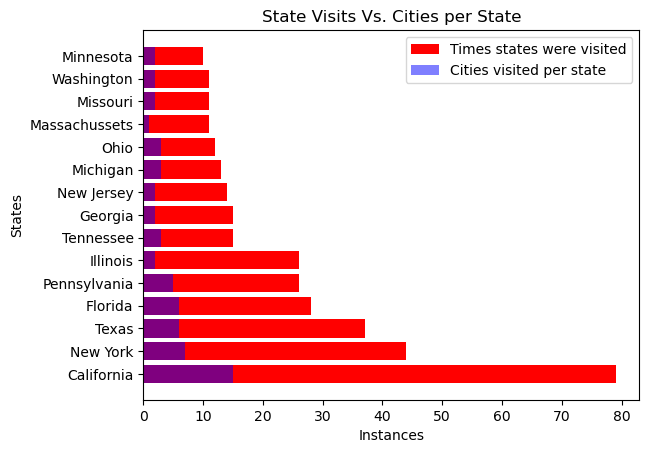

In [53]:
fig2, ax2 = plt.subplots()
g1 = ax2.barh(analysis_df['State'].head(15), analysis_df['State Num'].head(15), color = 'red', label = "Times states were visited")
g2 = ax2.barh(analysis_df['State'].head(15), analysis_df['Cities Num'].head(15), alpha = 0.5, color = 'blue', label = "Cities visited per state")

ax2.legend(handles = [g1, g2])
ax2.set_title("State Visits Vs. Cities per State")
ax2.set_xlabel("Instances")
ax2.set_ylabel("States")

Here is that same table, this time arranged as a scatterplot. This makes it a lot easier to see how extreme the outlier California is. It's not quite linear, but you can see where the average lies.

This chart, because it includes all of the data, makes it easy to see the large amount of variance in overall state visits versus cities visited. Though there is only one city visited, artists could go to the state anywhere between 1-10 times. There's a large amount of variance here, and it would be worth looking into what cities are on the upper end of this scale, and seeing whether this correlates with a higher revenue. This chart makes the loose correlation a lot easier to see than the bar chart.

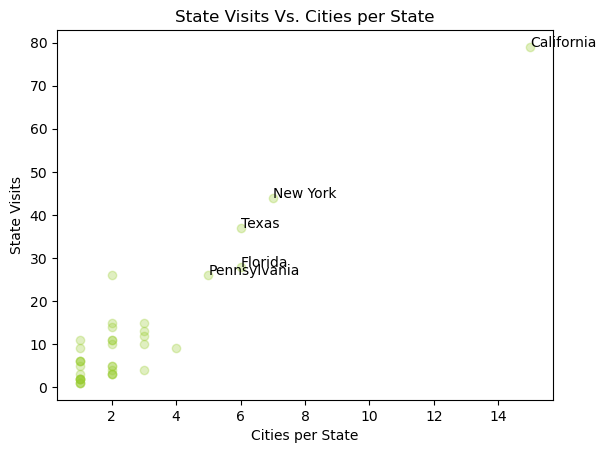

In [55]:
fig3, ax3 = plt.subplots()
ax3.scatter(analysis_df['Cities Num'], analysis_df['State Num'], color = 'yellowgreen', alpha = 0.3, label = "Times states were visited") 
ax3.set_title("State Visits Vs. Cities per State")
ax3.set_xlabel("Cities per State")
ax3.set_ylabel("State Visits")

analysis_df[['Cities Num', 'State Num', 'State']].head(5).apply(lambda x: ax3.text(*x),axis=1)
plt.show()

This chart compares the attendance vs. the revenue. I think it's interesting how much closer California and New York are in this set. Plus, the three below them are different from the ones at the top of every other chart. But, they are still high enough on the other charts for this to not be a very shocking jump.

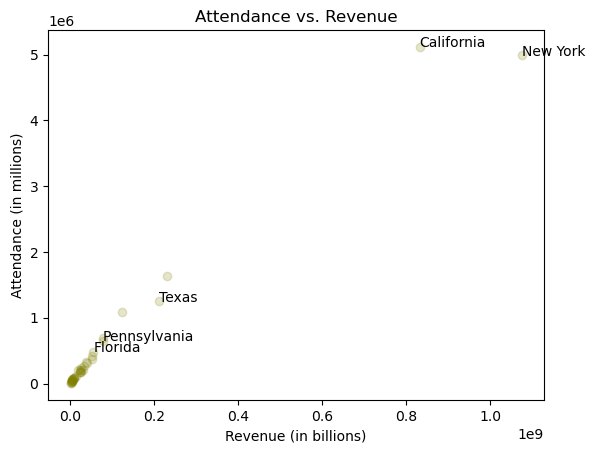

In [58]:
fig4, ax4 = plt.subplots()
ax4.scatter(analysis_df['Revenue'], analysis_df['Attendance'], alpha = 0.2, color = 'olive')

ax4.set_xlabel('Revenue (in billions)')
ax4.set_ylabel('Attendance (in millions)')
ax4.set_title ('Attendance vs. Revenue')

analysis_df[['Revenue', 'Attendance', 'State']].head(5).apply(lambda x: ax4.text(*x),axis=1)
plt.show()

This all builds up to my last table. There's a clear correlation, but a lot more variance than I was expecting. What jumps out at me is how low revenue is for Texas, around the same as Illinois, even though Texas has many more cities. Referring to the first chart, Texas is 3rd in overall state visits compared to Illinois's 6th place, making it even more interesting. In terms of what could be causing that difference, I'm not sure. Two ideas are that larger cities (i.e. Chicago) may charge more for tickets. Another idea would be that Texas could have larger expenses, but the tables don't distinguish whether the income is net or gross. I'm operating under the assumption that it's net, so I don't have a clear idea of why the revenue could vary this much.

But, this really shows the differences in the margins between states. Texas and Florida have the same number of cities, but there is a much higher profit associated with a visit to Texas.

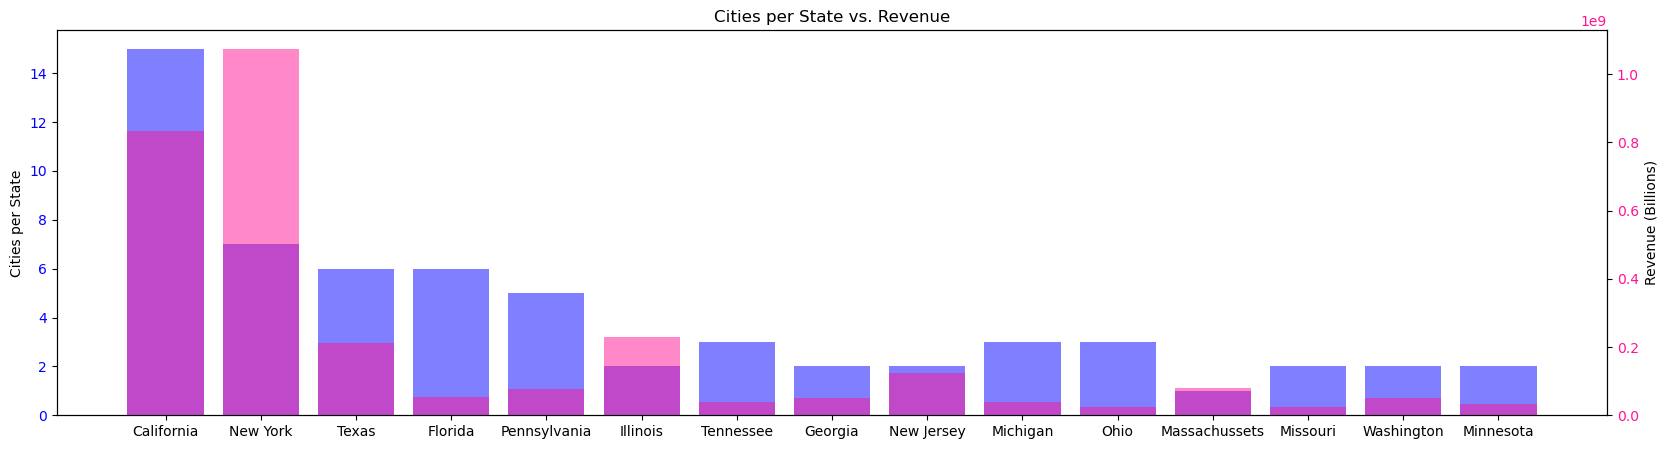

In [102]:
fig, ax5 = plt.subplots(figsize = (20, 5))

# Create the first bar plot
ax5.bar(analysis_df['State'].head(15), analysis_df['Cities Num'].head(15), color='blue', alpha = 0.5)
ax5.set_ylabel('Cities per State')
ax5.tick_params(axis='y', labelcolor='blue')


ax6 = ax5.twinx()

# Create the second bar plot
ax6.bar(analysis_df['State'].head(15), analysis_df['Revenue'].head(15), color='deeppink', alpha = 0.5)
ax6.set_ylabel('Revenue (Billions)')
ax6.tick_params(axis='y', labelcolor='deeppink')

ax5.set_title ('Cities per State vs. Revenue')

plt.show()

It also really surprised me how far New York's revenue is compared to the cities. I thought this might be because of the amount of times that New York City would be visited, so I created this chart to rule out that possibility. But this chart shows that no, even though New York has a much lower number of visits than California, it has a much higher revenue than California. This was really surprising! My first thought was about Madison Square Garden, and how that is the "ultimate" venue to a lot of artists, so that might call for a higher ticket price, but I don't think that would bridge the entire gap.

While my hypothesis was about the cities specifically, I feel like this chart is easier to draw conclusions from and better illustrates the variance I am trying to showcase.

Similarly, this chart can be used to draw conclusions about profit margin. Massachussets and Missouri were visited almost the same number of times, but Massachussets had a much higher revenue. This could cause an event planner to choose scheduling a concert in Massachussets instead, because it shows the profit per show is much greater.

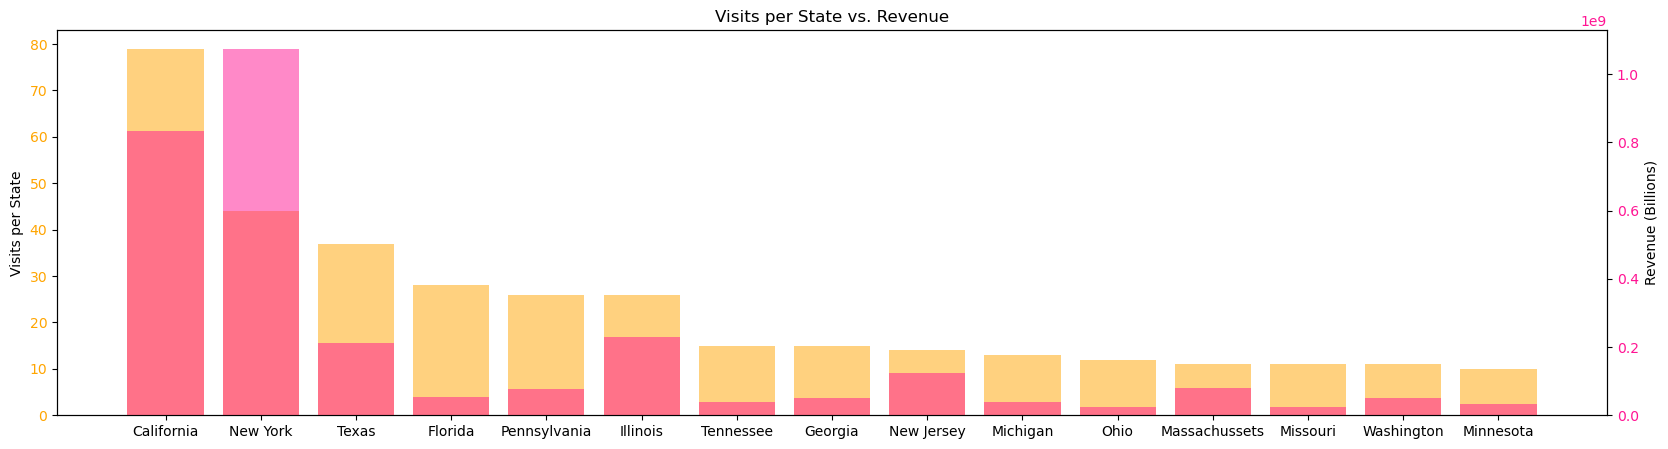

In [103]:
fig, ax7 = plt.subplots(figsize = (20, 5))

h1 = ax7.bar(analysis_df['State'].head(15), analysis_df['State Num'].head(15), color='orange', alpha = 0.5)
ax7.set_ylabel('Visits per State')
ax7.tick_params(axis='y', labelcolor='orange')


ax8 = ax7.twinx()

h2 = ax8.bar(analysis_df['State'].head(15), analysis_df['Revenue'].head(15), color='deeppink', alpha = 0.5)
ax8.set_ylabel('Revenue (Billions)')
ax8.tick_params(axis='y', labelcolor='deeppink')

ax7.set_title ('Visits per State vs. Revenue')

plt.show()

## Conclusion

The results were pretty much as I expected. California and New York topped all of the charts, and while the ~10 or so states underneath them changed, they were roughly the same. But I think this data provides a really interesting foundation to move forward with.

I expected New York and California to dominate in all of the graphs, but I was surprised at just how ahead they were of the other states. When fans are disappointed that an artist is not coming to them, a gut reaction is to say "It's *always* California!" But this report shows that it truly *is* always California, and fans might be justified in feeling that way. While the profit of California is very high, it also has a slightly higher margin than most other states, justifying why it's visited so consistently. But, there are other states visited less that have a similarly high margin, which could give a reason to visit those states more often.

One limitation I found was the severe lack of financial data for concerts that was not kept behind a paywall. All of my data comes from Wikipedia: it cites the original Pollstar data I wanted to use, but was paywalled. Another limiation was the amount of manual data entry I had to complete in order to get the states attached, limiting the amount of tours I could scrape for data.

Another potential concern was the lack of attendance and revenue data for the Eras Tour. On a larger dataset, it may not matter as much, but with only five tours to pull from I feel it had the possiblity to warp the findings. But because the eras tour was so "iconic", I found it hard to justify removing it from the dataset entirely.

I considered working with the venue names, but decided against it. I figured an artist would choose a tour based on the states or cities, and the venue would be decided based on the contract offered, capacity, technical capabilites, timing, etc. But the variance in the revenue vs. the cities per state makes me curious about what could be the cause for that variance, for New York especially. A next step for me would be to dig into the average revenue per venue, since cities can have multiple venues, and see if there are any outliers in that data.

I am not sure what could be causing the wide variance between profitability among states with the same amount of shows. This was really interesting to me, because I was expecting a similar margin among each state. This is something that I would want to look into more, but it might require the context of industry knowledge alongside more financial data to make sense.

This data is a long way from being something that tour managers could use to make decisions, but I think it's on it's way to becoming an interesting visualization for fans. Tour managers have not only more data to work with, but more of an idea of how the industry works. But these findings seem to confirm a lot of complaints that fans have about the variety in locations visited on tour, and could start a conversation about how to bridge fan expectations while still keeping a tour profitable.